In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge

## Part 2_1

In [2]:
df = pd.read_csv("../Desktop/prostate.data.txt", delimiter="\t").drop(["Unnamed: 0", "train"], axis=1)

In [3]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


<AxesSubplot:>

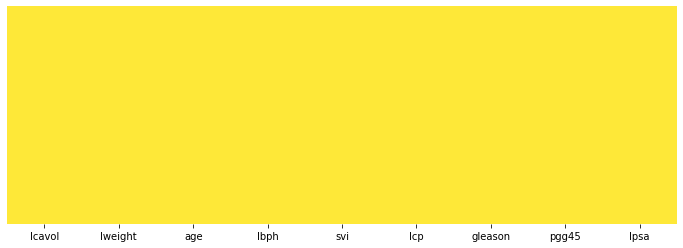

In [4]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap="cividis_r") #checking for missing values

This plane graph depict no missing value

In [5]:
df_standardize = (df - df.mean(axis=0))/df.std(axis=0) #standard

In [6]:
df_standardize.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-2.520226
1,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-2.287827
2,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-2.287827
3,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-2.287827
4,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-1.825150


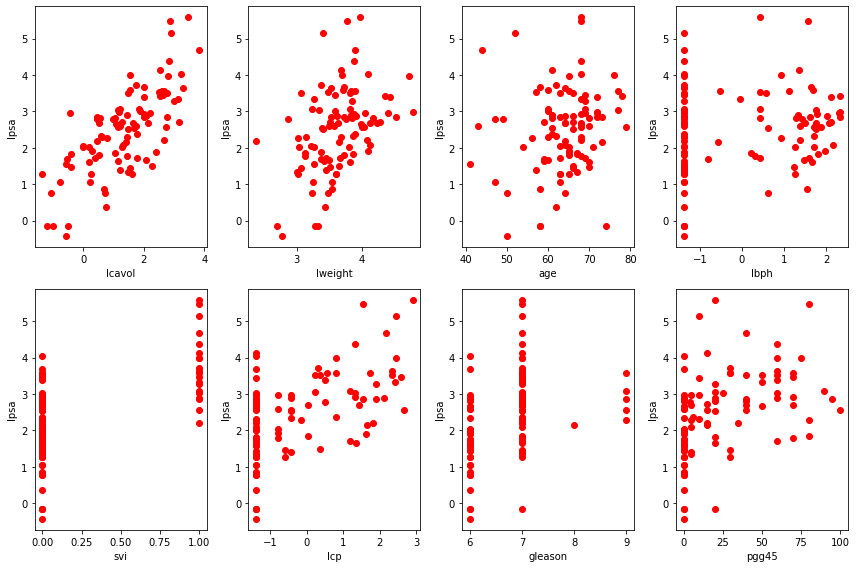

In [7]:
fig, ax = plt.subplots(2,4, figsize=(12, 8))
for i, j, df_x, df_y in zip(np.repeat(range(len(ax)), 4), list(range(4)) * len(ax), 
                   df_standardize.columns.drop("lpsa"), list(df.columns)[-1:] * len(df_standardize.columns.drop("lpsa"))):
    ax[i][j].scatter(df[df_x], df[df_y], color="red")
    ax[i][j].set_xlabel(df_x)
    ax[i][j].set_ylabel(df_y)
    plt.tight_layout()

From the scatterplot, `lcavol`, `svi`seems to be a categorical variable and `lcp` seems to be highly positively corellated with the response variable, and none of the predictors have a negative correlation with the target variable. 

## Part 2_2

In [8]:
X = df.drop("lpsa", axis=1)
y = df["lpsa"]

In [9]:
X_b = np.c_[np.ones((len(X), 1)), X]
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y.values)

In [10]:
w

array([ 0.18156085,  0.56434128,  0.62201979, -0.02124819,  0.09671252,
        0.7616734 , -0.10605094,  0.04922793,  0.00445751])

The value of my parameters including that of the bias from $x_{0}$ to $x_{9}$ is given by ***W***

In [11]:
#To take samples of the posterior w, in Question 1
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

In [12]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return np.array(posterior)

C:\Users\odira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\odira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\odira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

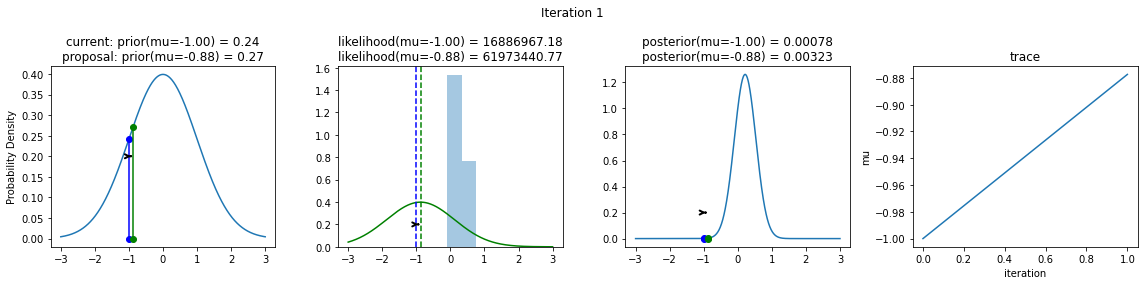

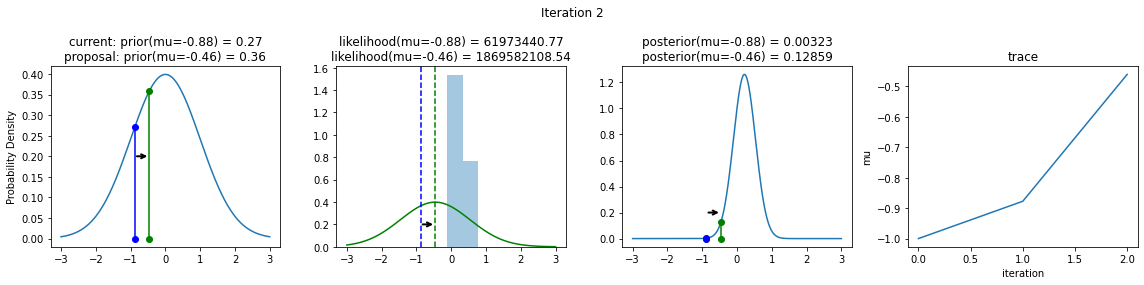

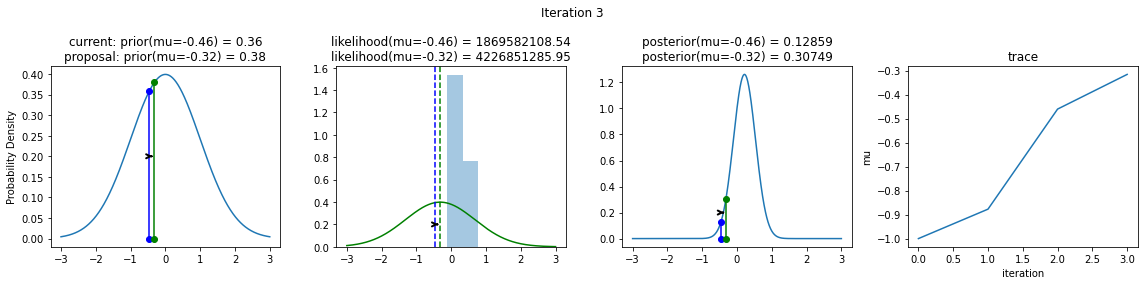

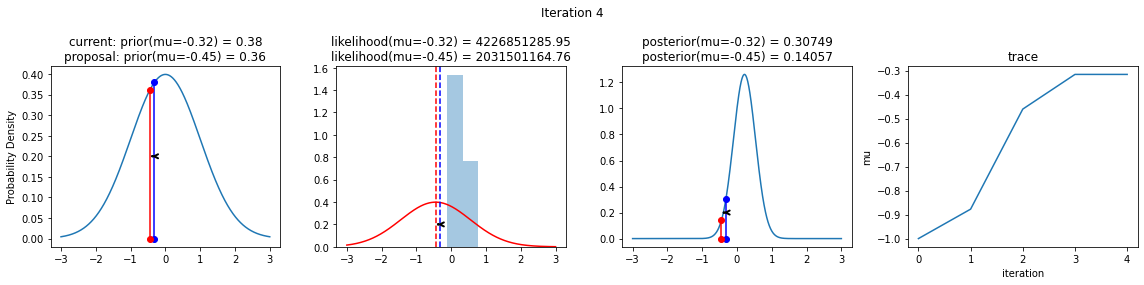

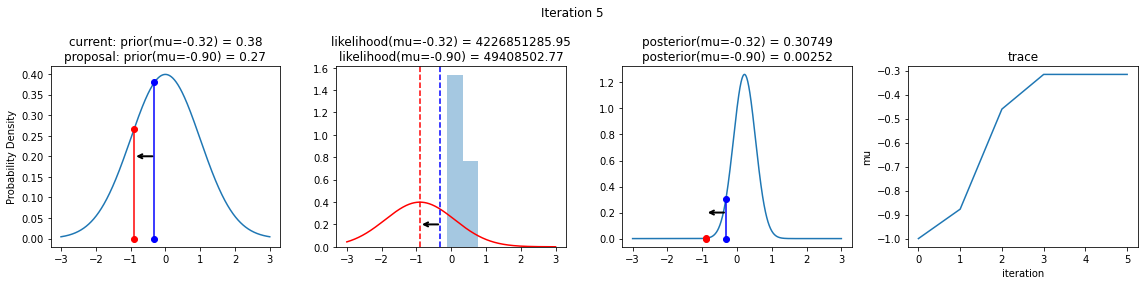

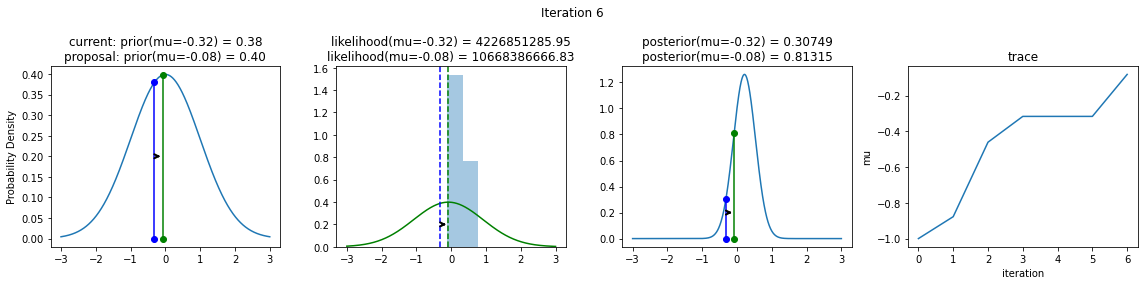

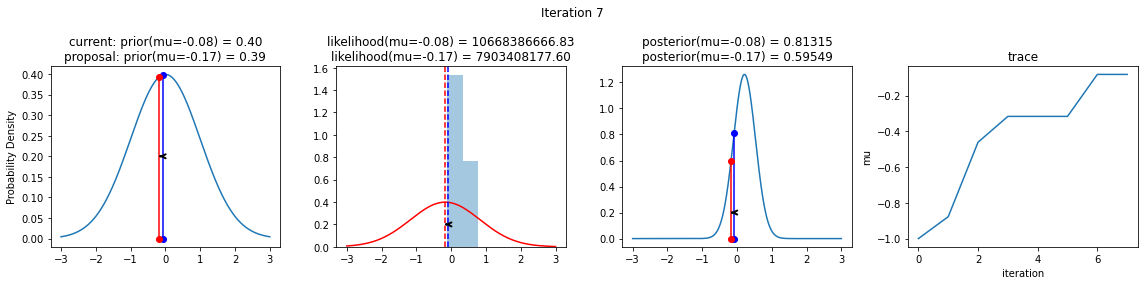

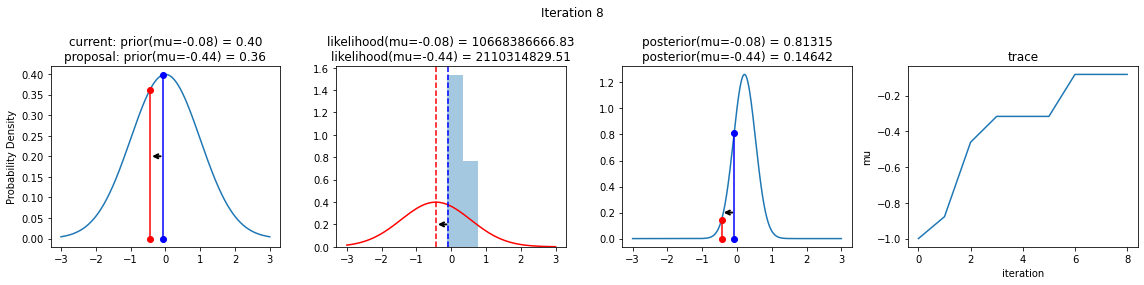

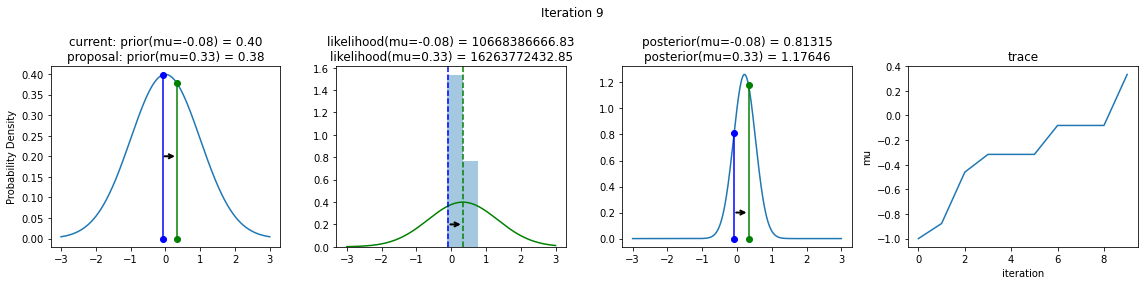

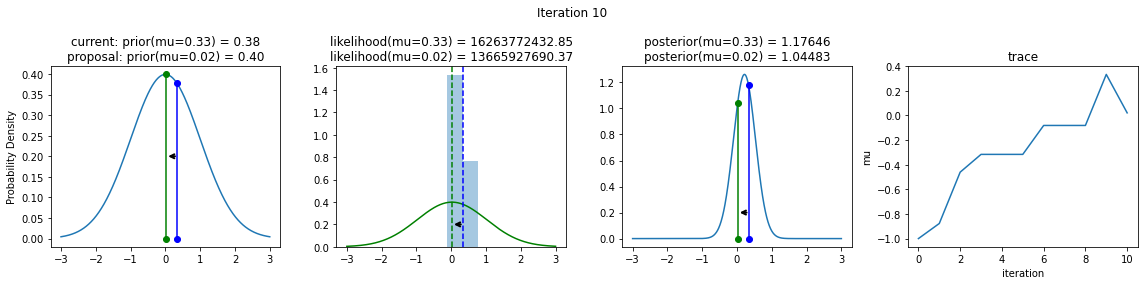

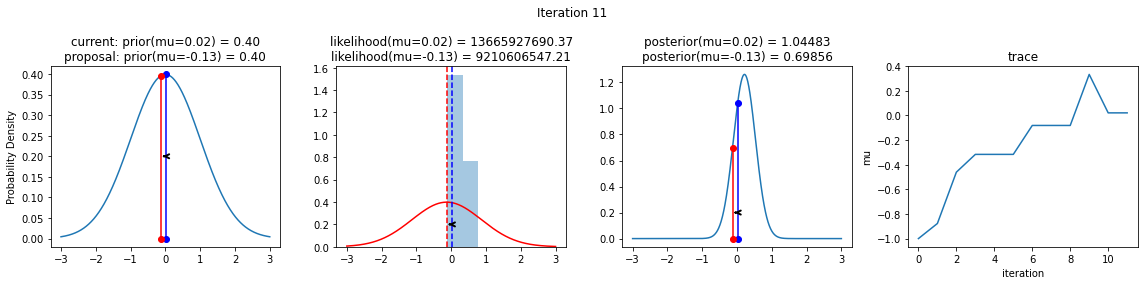

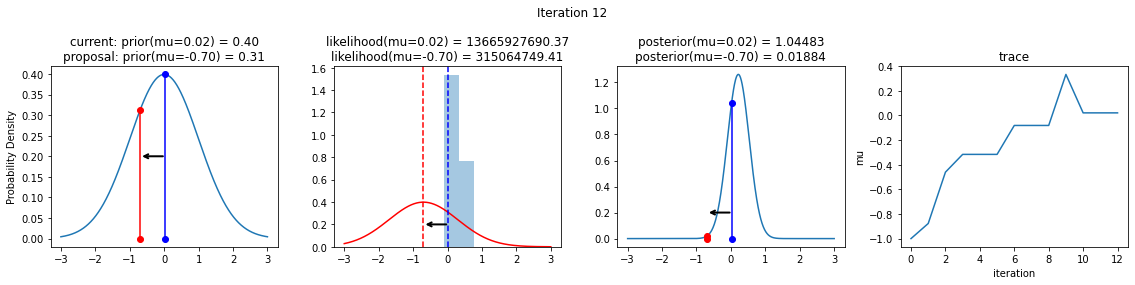

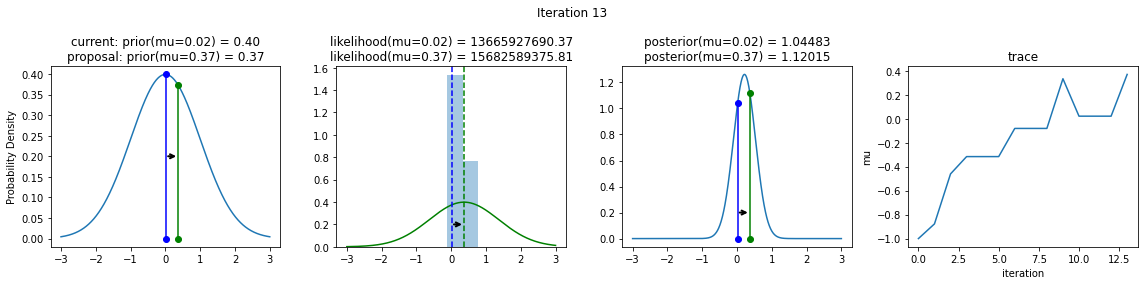

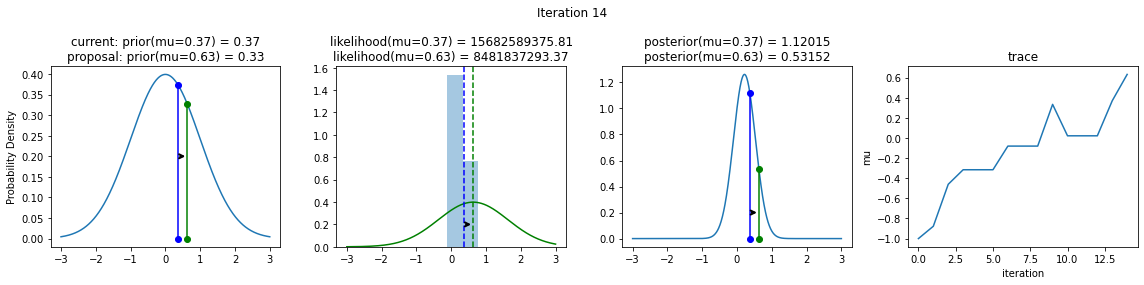

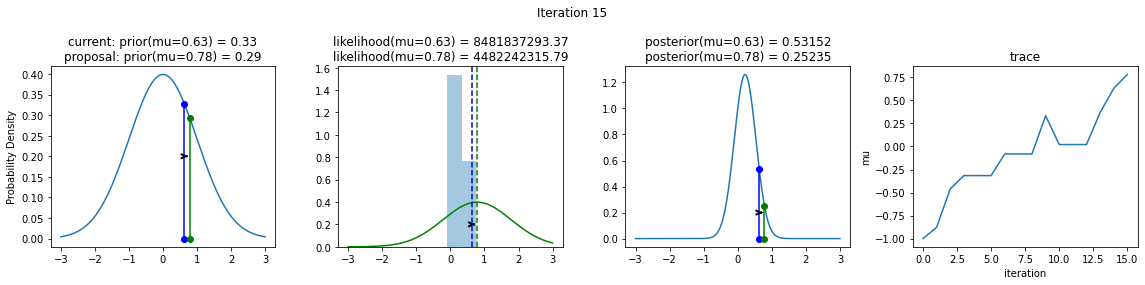

In [13]:
# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 1000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()
    
sampler(w, samples=15, mu_init=-1., plot=True);

## Part 2_3

Using K-Fold cross-validation to determine the appropriate learning rate, $\lambda$

In [14]:
train_X, test_X, train_y, test_y = train_test_split(df.drop("lpsa", axis = 1), df["lpsa"], test_size = 0.2, random_state = 42)

learning_rates = [0, 1e-3, 1e-2, 1e-1, 1, 1e1, 10, 100, 1000, 2000, 5000]
cv = KFold(n_splits=10)

val_errors = []
for learning_rate in learning_rates:
    ridge = Ridge(alpha=learning_rate, random_state=42)
    errors = np.mean(cross_val_score(ridge, train_X, train_y, scoring='neg_mean_squared_error', cv=cv))
    val_errors.append(np.sqrt(-errors))

In [15]:
learning_rates[val_errors.index(min(val_errors))]

1

The appropriate value for $\lambda = 1$ that tends to overfit the model. We can see how the learning rate plays out across different $\lambda$.

In [16]:
def ridge(learning_rates):
    # Create an empty data frame
    data = pd.DataFrame()
    data['Feature Name'] = df.columns.drop("lpsa")
    
    # For each alpha value in the list of alpha values,
    for learning_rate in learning_rates:
        ridge = Ridge(alpha=learning_rate, random_state=42)
        ridge.fit(df.drop("lpsa", axis = 1), df["lpsa"])  
        # Create a column name for that alpha value
        column_name = 'lr = %f' % learning_rate
        # Create a column of coefficient values
        data[column_name] = ridge.coef_
  
    # Return the dataframe   
    return data

ridge(learning_rates)

,Feature Name,lr = 0.000000,lr = 0.001000,lr = 0.010000,lr = 0.100000,lr = 1.000000,lr = 10.000000,lr = 100.000000,lr = 1000.000000,lr = 2000.000000,lr = 5000.000000
0,lcavol,0.564341,0.564341,0.564342,0.564345,0.563762,0.532865,0.301768,0.062290,0.033454,0.014157
1,lweight,0.622020,0.621979,0.621608,0.617932,0.583576,0.382318,0.106300,0.016211,0.008500,0.003540
2,age,-0.021248,-0.021247,-0.021239,-0.021155,-0.020372,-0.015395,-0.003120,0.005588,0.005732,0.004703
3,lbph,0.096713,0.096714,0.096727,0.096858,0.098121,0.104986,0.079876,0.018223,0.009925,0.004294
4,svi,0.761673,0.761588,0.760821,0.753239,0.685508,0.373626,0.091962,0.015356,0.008156,0.003440
5,lcp,-0.106051,-0.106031,-0.105851,-0.104073,-0.087804,0.001383,0.106710,0.036151,0.020200,0.008876
6,gleason,0.049228,0.049217,0.049115,0.048109,0.039376,0.009284,0.009695,0.003444,0.002048,0.001052
7,pgg45,0.004458,0.004458,0.004459,0.004473,0.004591,0.004970,0.007392,0.014162,0.015085,0.015337


## Part 2_4

Using **Singular Value Decomposition (SVD)** technique to decompose the training set matrix `df_standardize` into the matrix multiplication of three matrices `U` `Σ`, `V`<sup>T</sup>, where `V` contains the unit vectors that define all the principal components that we are looking for.

In [17]:
df_centered = df - df.mean() #mean centering
U, sigma, Vt = np.linalg.svd(df_centered.iloc[:, :-1]) #response variable not included
W2 = Vt.T[:, :]

In [18]:
#print out the principal components
pc = df_centered.iloc[:, :-1].dot(W2)
pc.columns = ["z1", "z2", "z3", "z4", "z5", "z6", "z7", "z8"]
pc

,z1,z2,z3,z4,z5,z6,z7,z8
0,-25.459202,12.030635,-0.538722,1.335912,-0.574250,-0.012538,-0.368914,0.122934
1,-24.845056,4.074839,-0.383910,1.917513,-1.002525,0.089402,0.122153,0.049582
2,-3.654424,-10.273257,0.109555,3.146353,-0.743257,-0.604385,-0.513588,0.156981
3,-24.848936,4.079094,-0.484650,2.022187,-1.154771,0.061686,0.114518,0.063587
4,-24.502729,0.067452,0.645971,1.303411,0.170393,0.276855,-0.039887,-0.044356
...,...,...,...,...,...,...,...,...
92,35.878536,-1.243826,1.853127,0.595723,0.235356,0.627420,0.179679,0.275541
93,14.138598,21.048719,2.189831,-2.165541,0.704699,0.286596,0.361884,0.176673
94,-15.132307,10.792222,3.091581,-2.077010,-0.585431,-0.461103,0.001748,0.305018
95,55.821790,0.105133,-0.581274,-1.122968,0.226914,0.871527,-0.312716,0.334446


Finding the `eigenvalue`, `eigenvector` and `covariance` to solve the principal componenets

In [19]:
cov = np.cov(df_centered.iloc[:, :-1], rowvar = False)
evals , evecs = np.linalg.eig(cov)

# sort results wrt. eigenvalues
idx = evals.argsort()[::-1]
evals, evecs = evals[idx], evecs[:, idx]

# projections of X on the principal axes are called principal components
principal_components = df_centered.iloc[:, :-1].dot(evecs)

In [20]:
principal_components.columns = ["z1", "z2", "z3", "z4", "z5", "z6", "z7", "z8"]
principal_components

,z1,z2,z3,z4,z5,z6,z7,z8
0,-25.459202,12.030635,-0.538722,-1.335912,-0.574250,-0.012538,0.368914,0.122934
1,-24.845056,4.074839,-0.383910,-1.917513,-1.002525,0.089402,-0.122153,0.049582
2,-3.654424,-10.273257,0.109555,-3.146353,-0.743257,-0.604385,0.513588,0.156981
3,-24.848936,4.079094,-0.484650,-2.022187,-1.154771,0.061686,-0.114518,0.063587
4,-24.502729,0.067452,0.645971,-1.303411,0.170393,0.276855,0.039887,-0.044356
...,...,...,...,...,...,...,...,...
92,35.878536,-1.243826,1.853127,-0.595723,0.235356,0.627420,-0.179679,0.275541
93,14.138598,21.048719,2.189831,2.165541,0.704699,0.286596,-0.361884,0.176673
94,-15.132307,10.792222,3.091581,2.077010,-0.585431,-0.461103,-0.001748,0.305018
95,55.821790,0.105133,-0.581274,1.122968,0.226914,0.871527,0.312716,0.334446


Using the **sklearn** built-in module, we can get the principal components as such:

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X2D = pca.fit_transform(df.iloc[:, :-1]) #df was used because Scikit-Learn’s PCA classes take care of centering the data for you.

In [22]:
pd.DataFrame(X2D, columns = ["z1", "z2", "z3", "z4", "z5", "z6", "z7", "z8"])

,z1,z2,z3,z4,z5,z6,z7,z8
0,-25.459202,12.030635,-0.538722,1.335912,-0.574250,0.012538,-0.368914,0.122934
1,-24.845056,4.074839,-0.383910,1.917513,-1.002525,-0.089402,0.122153,0.049582
2,-3.654424,-10.273257,0.109555,3.146353,-0.743257,0.604385,-0.513588,0.156981
3,-24.848936,4.079094,-0.484650,2.022187,-1.154771,-0.061686,0.114518,0.063587
4,-24.502729,0.067452,0.645971,1.303411,0.170393,-0.276855,-0.039887,-0.044356
...,...,...,...,...,...,...,...,...
92,35.878536,-1.243826,1.853127,0.595723,0.235356,-0.627420,0.179679,0.275541
93,14.138598,21.048719,2.189831,-2.165541,0.704699,-0.286596,0.361884,0.176673
94,-15.132307,10.792222,3.091581,-2.077010,-0.585431,0.461103,0.001748,0.305018
95,55.821790,0.105133,-0.581274,-1.122968,0.226914,-0.871527,-0.312716,0.334446


Comparing the **3** results, all yielded same PCs

(-1.6054775107500001, 4.0794074697500005, 2.2546321500000004, 4.90065685)

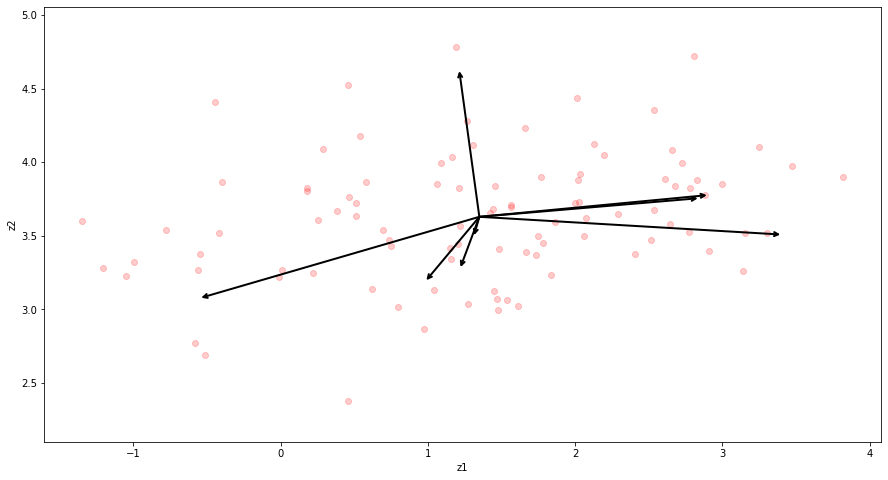

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(15, 8))
df = df.values
plt.scatter(df[:, 0], df[:, 1], alpha=0.2, color="red")
plt.xlabel("z1"), plt.ylabel('z2')
for len, vec in zip(pca.explained_variance_, pca.components_[:, :2]):
    v = vec * 3 * np.sqrt(len)
    draw_vector(pca.mean_[:2], pca.mean_[:2] + v)
plt.axis('equal')

From the plot, 2 PCs seems to carry much information and it's save to reduce the dimensionality of the training predictor into 2 PCs, and this can be verified below:

In [24]:
pca.explained_variance_ratio_[:2]

array([0.93485031, 0.05974072])

The explained variance indicates the proportion of the dataset’s variance that lies along each principal component. This output tells you that 93.5% of the dataset’s variance lies along the first PC, and just 5.97% lies along the second PC. This leaves less than 0.541% for the other PC, so it is reasonable to assume that the 3rd, 4th, 5th, 6th, 7th and 8th PCs probably carries little/no information, and they can be dropped off. 

(-1.6054775107500001, 4.0794074697500005, 2.2546321500000004, 4.90065685)

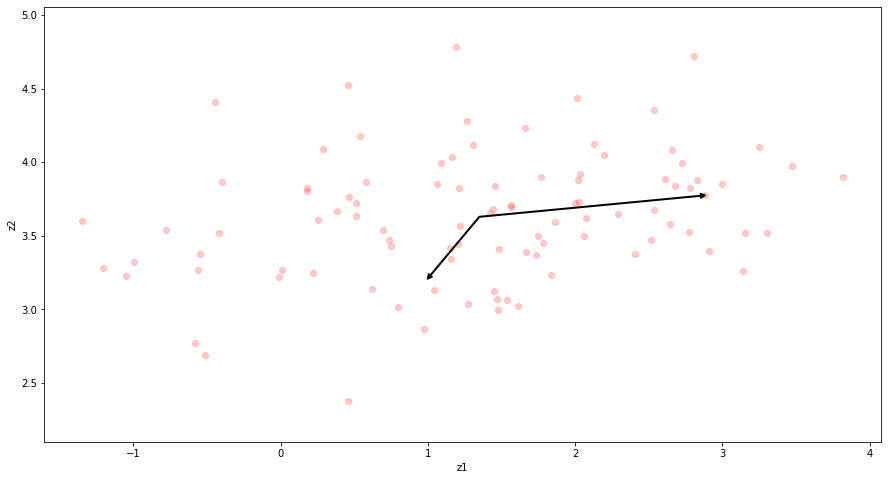

In [25]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(15, 8))
plt.scatter(df[:, 0], df[:, 1], alpha=0.2, color="red")
plt.xlabel("z1"), plt.ylabel('z2')
for len, vec in zip(pca.explained_variance_[:2], pca.components_[:2, :2]):
    v = vec * 3 * np.sqrt(len)
    draw_vector(pca.mean_[:2], pca.mean_[:2] + v)
plt.axis('equal')